In [1]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("WellbeingData").getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/12 21:26:59 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
# Read data in the form of csv
df = spark.read.csv('Wellbeing_and_lifestyle_data_Kaggle.csv')

In [3]:
# Show DataFrames
df.show()

+---------+--------------+------------+--------------+-----------+-----------------+--------------+-----------+--------+---------+--------------+----+-----------+-----------+-----------+-------------+--------------+-----------------+---------------+----------------+-----------------+----------+------+--------------------+
|      _c0|           _c1|         _c2|           _c3|        _c4|              _c5|           _c6|        _c7|     _c8|      _c9|          _c10|_c11|       _c12|       _c13|       _c14|         _c15|          _c16|             _c17|           _c18|            _c19|             _c20|      _c21|  _c22|                _c23|
+---------+--------------+------------+--------------+-----------+-----------------+--------------+-----------+--------+---------+--------------+----+-----------+-----------+-----------+-------------+--------------+-----------------+---------------+----------------+-----------------+----------+------+--------------------+
|Timestamp|FRUITS_VEGGIES|DA

In [4]:
# Get general statistics on our data
df.describe().show()

+-------+---------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+------------+------+--------------------+
|summary|      _c0|               _c1|               _c2|               _c3|               _c4|              _c5|              _c6|               _c7|               _c8|               _c9|             _c10|              _c11|              _c12|             _c13|              _c14|              _c15|              _c16|               _c17|              _c18|              _c19|             _c20|        _c21|  _c22|                _c23|
+-------+---------+------------------+------------------+------------------+------------------+-----------------+-------------

In [5]:
# Print data type
df.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)
 |-- _c19: string (nullable = true)
 |-- _c20: string (nullable = true)
 |-- _c21: string (nullable = true)
 |-- _c22: string (nullable = true)
 |-- _c23: string (nullable = true)



In [6]:
df.head(1)

[Row(_c0='Timestamp', _c1='FRUITS_VEGGIES', _c2='DAILY_STRESS', _c3='PLACES_VISITED', _c4='CORE_CIRCLE', _c5='SUPPORTING_OTHERS', _c6='SOCIAL_NETWORK', _c7='ACHIEVEMENT', _c8='DONATION', _c9='BMI_RANGE', _c10='TODO_COMPLETED', _c11='FLOW', _c12='DAILY_STEPS', _c13='LIVE_VISION', _c14='SLEEP_HOURS', _c15='LOST_VACATION', _c16='DAILY_SHOUTING', _c17='SUFFICIENT_INCOME', _c18='PERSONAL_AWARDS', _c19='TIME_FOR_PASSION', _c20='WEEKLY_MEDITATION', _c21='AGE', _c22='GENDER', _c23='WORK_LIFE_BALANCE_SCORE')]

In [7]:
# Create a new DataFrame with the first row of your original data as column names
new_column_names = df.take(2)[0]
df = df.toDF(*new_column_names)

# Remove the first two rows from the original data
df = df.filter(df['Timestamp'] != 'Timestamp')

# Update head
df.head()

Row(Timestamp='7/7/15', FRUITS_VEGGIES='3', DAILY_STRESS='2', PLACES_VISITED='2', CORE_CIRCLE='5', SUPPORTING_OTHERS='0', SOCIAL_NETWORK='5', ACHIEVEMENT='2', DONATION='0', BMI_RANGE='1', TODO_COMPLETED='6', FLOW='4', DAILY_STEPS='5', LIVE_VISION='0', SLEEP_HOURS='7', LOST_VACATION='5', DAILY_SHOUTING='5', SUFFICIENT_INCOME='1', PERSONAL_AWARDS='4', TIME_FOR_PASSION='0', WEEKLY_MEDITATION='5', AGE='36 to 50', GENDER='Female', WORK_LIFE_BALANCE_SCORE='609.5')

In [8]:
# Data type transformation
from pyspark.sql.functions import col
from pyspark.sql.types import (StructField,StringType,IntegerType,StructType)

columns_to_convert = ['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 
                      'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK',
                      'ACHIEVEMENT', 'DONATION', 'BMI_RANGE',
                      'TODO_COMPLETED','FLOW', 'DAILY_STEPS',
                      'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 
                      'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 'PERSONAL_AWARDS',
                      'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'WORK_LIFE_BALANCE_SCORE']

df.columns

# Change data type
for column_name in columns_to_convert:
    df = df.withColumn(column_name, col(column_name).cast(IntegerType()))

df.printSchema()

root
 |-- Timestamp: string (nullable = true)
 |-- FRUITS_VEGGIES: integer (nullable = true)
 |-- DAILY_STRESS: integer (nullable = true)
 |-- PLACES_VISITED: integer (nullable = true)
 |-- CORE_CIRCLE: integer (nullable = true)
 |-- SUPPORTING_OTHERS: integer (nullable = true)
 |-- SOCIAL_NETWORK: integer (nullable = true)
 |-- ACHIEVEMENT: integer (nullable = true)
 |-- DONATION: integer (nullable = true)
 |-- BMI_RANGE: integer (nullable = true)
 |-- TODO_COMPLETED: integer (nullable = true)
 |-- FLOW: integer (nullable = true)
 |-- DAILY_STEPS: integer (nullable = true)
 |-- LIVE_VISION: integer (nullable = true)
 |-- SLEEP_HOURS: integer (nullable = true)
 |-- LOST_VACATION: integer (nullable = true)
 |-- DAILY_SHOUTING: integer (nullable = true)
 |-- SUFFICIENT_INCOME: integer (nullable = true)
 |-- PERSONAL_AWARDS: integer (nullable = true)
 |-- TIME_FOR_PASSION: integer (nullable = true)
 |-- WEEKLY_MEDITATION: integer (nullable = true)
 |-- AGE: string (nullable = true)
 |-- G

In [9]:
# Print unique values
distinct_values = df.select("DAILY_STRESS").distinct()
distinct_values.show()
distinct_values = df.select("AGE").distinct()
distinct_values.show()
distinct_values = df.select("GENDER").distinct()
distinct_values.show()

+------------+
|DAILY_STRESS|
+------------+
|        null|
|           1|
|           3|
|           5|
|           4|
|           2|
|           0|
+------------+

+------------+
|         AGE|
+------------+
|  51 or more|
|    36 to 50|
|    21 to 35|
|Less than 20|
+------------+

+------+
|GENDER|
+------+
|Female|
|  Male|
+------+



In [10]:
# print 10 values for work-life-balance score
df.select("WORK_LIFE_BALANCE_SCORE").show(10)

+-----------------------+
|WORK_LIFE_BALANCE_SCORE|
+-----------------------+
|                    609|
|                    655|
|                    631|
|                    622|
|                    663|
|                    722|
|                    727|
|                    676|
|                    702|
|                    634|
+-----------------------+
only showing top 10 rows



In [11]:
# Get general statistics again
df.describe().show()

+-------+-----------+------------------+------------------+------------------+------------------+-----------------+-----------------+------------------+------------------+------------------+-----------------+------------------+------------------+-----------------+------------------+------------------+------------------+-------------------+------------------+------------------+-----------------+------------+------+-----------------------+
|summary|  Timestamp|    FRUITS_VEGGIES|      DAILY_STRESS|    PLACES_VISITED|       CORE_CIRCLE|SUPPORTING_OTHERS|   SOCIAL_NETWORK|       ACHIEVEMENT|          DONATION|         BMI_RANGE|   TODO_COMPLETED|              FLOW|       DAILY_STEPS|      LIVE_VISION|       SLEEP_HOURS|     LOST_VACATION|    DAILY_SHOUTING|  SUFFICIENT_INCOME|   PERSONAL_AWARDS|  TIME_FOR_PASSION|WEEKLY_MEDITATION|         AGE|GENDER|WORK_LIFE_BALANCE_SCORE|
+-------+-----------+------------------+------------------+------------------+------------------+-----------------+-

In [12]:
# List of variable column names
variable_columns = ['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 
                      'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK',
                      'ACHIEVEMENT', 'DONATION', 'BMI_RANGE',
                      'TODO_COMPLETED','FLOW', 'DAILY_STEPS',
                      'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 
                      'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 'PERSONAL_AWARDS',
                      'TIME_FOR_PASSION', 'WEEKLY_MEDITATION']

# Calculate correlations with WORK_LIFE_BALANCE_SCORE and print with two decimal places
for variable in variable_columns:
    correlation_coefficient = df.corr(variable, 'WORK_LIFE_BALANCE_SCORE')
    formatted_coefficient = "{:.2f}".format(correlation_coefficient)
    print(f"Correlation between {variable} and WORK_LIFE_BALANCE_SCORE: {formatted_coefficient}")


Correlation between FRUITS_VEGGIES and WORK_LIFE_BALANCE_SCORE: 0.45
Correlation between DAILY_STRESS and WORK_LIFE_BALANCE_SCORE: -0.37
Correlation between PLACES_VISITED and WORK_LIFE_BALANCE_SCORE: 0.53
Correlation between CORE_CIRCLE and WORK_LIFE_BALANCE_SCORE: 0.51
Correlation between SUPPORTING_OTHERS and WORK_LIFE_BALANCE_SCORE: 0.55
Correlation between SOCIAL_NETWORK and WORK_LIFE_BALANCE_SCORE: 0.41
Correlation between ACHIEVEMENT and WORK_LIFE_BALANCE_SCORE: 0.56
Correlation between DONATION and WORK_LIFE_BALANCE_SCORE: 0.46
Correlation between BMI_RANGE and WORK_LIFE_BALANCE_SCORE: -0.25
Correlation between TODO_COMPLETED and WORK_LIFE_BALANCE_SCORE: 0.55
Correlation between FLOW and WORK_LIFE_BALANCE_SCORE: 0.48
Correlation between DAILY_STEPS and WORK_LIFE_BALANCE_SCORE: 0.42
Correlation between LIVE_VISION and WORK_LIFE_BALANCE_SCORE: 0.47
Correlation between SLEEP_HOURS and WORK_LIFE_BALANCE_SCORE: 0.20
Correlation between LOST_VACATION and WORK_LIFE_BALANCE_SCORE: -0.2

In [13]:
# Check null value
for column in df.columns:
    null_count = df.where(col(column).isNull()).count()
    print(f"Column {column} has {null_count} null values.")

Column Timestamp has 0 null values.
Column FRUITS_VEGGIES has 0 null values.
Column DAILY_STRESS has 1 null values.
Column PLACES_VISITED has 0 null values.
Column CORE_CIRCLE has 0 null values.
Column SUPPORTING_OTHERS has 0 null values.
Column SOCIAL_NETWORK has 0 null values.
Column ACHIEVEMENT has 0 null values.
Column DONATION has 0 null values.
Column BMI_RANGE has 0 null values.
Column TODO_COMPLETED has 0 null values.
Column FLOW has 0 null values.
Column DAILY_STEPS has 0 null values.
Column LIVE_VISION has 0 null values.
Column SLEEP_HOURS has 0 null values.
Column LOST_VACATION has 0 null values.
Column DAILY_SHOUTING has 0 null values.
Column SUFFICIENT_INCOME has 0 null values.
Column PERSONAL_AWARDS has 0 null values.
Column TIME_FOR_PASSION has 0 null values.
Column WEEKLY_MEDITATION has 0 null values.
Column AGE has 0 null values.
Column GENDER has 0 null values.
Column WORK_LIFE_BALANCE_SCORE has 0 null values.


In [14]:
# Extreme Value
sleep_hours_distribution = df.groupBy("SLEEP_HOURS").count().orderBy("SLEEP_HOURS")
sleep_hours_distribution.show()

+-----------+-----+
|SLEEP_HOURS|count|
+-----------+-----+
|          1|   18|
|          2|   21|
|          3|   49|
|          4|  252|
|          5| 1025|
|          6| 3397|
|          7| 5566|
|          8| 4324|
|          9|  987|
|         10|  333|
+-----------+-----+



In [15]:
from pyspark.sql.functions import col, avg, when, expr, mean
# Calculate the standard deviation
std_deviation = df.selectExpr('stddev(SLEEP_HOURS)').first()[0]
print("std_deviation: ", std_deviation)

# Calculate the threshold for extreme values
threshold = 3 * std_deviation
print("threshold: ", threshold)

average_sleep_hours = df.select("SLEEP_HOURS").agg({"SLEEP_HOURS": "avg"})

# Show the average value
average_sleep_hours.show()

std_deviation:  1.1990442948306186
threshold:  3.597132884491856
+-----------------+
| avg(SLEEP_HOURS)|
+-----------------+
|7.042887553218132|
+-----------------+



In [16]:
# Replace extreme values with the mean
df = df.withColumn("SLEEP_HOURS", when((col("SLEEP_HOURS") == 1) | (col("SLEEP_HOURS") == 2), 7).otherwise(col("SLEEP_HOURS")))

sleep_hours_distribution = df.groupBy("SLEEP_HOURS").count().orderBy("SLEEP_HOURS")
sleep_hours_distribution.show()

+-----------+-----+
|SLEEP_HOURS|count|
+-----------+-----+
|          3|   49|
|          4|  252|
|          5| 1025|
|          6| 3397|
|          7| 5605|
|          8| 4324|
|          9|  987|
|         10|  333|
+-----------+-----+



In [17]:
# Clean time stamp
from pyspark.sql.functions import substring, concat_ws

# Assuming the date column is named 'Timestamp,' create a new column 'Year' to extract the year
df = df.withColumn('Year', concat_ws('20', substring(col('Timestamp'), -2, 2)))

# print 10 values
df.select("Timestamp","Year").show(10)

+---------+----+
|Timestamp|Year|
+---------+----+
|   7/7/15|  15|
|   7/7/15|  15|
|   7/7/15|  15|
|   7/7/15|  15|
|   7/7/15|  15|
|   7/8/15|  15|
|   7/8/15|  15|
|   7/9/15|  15|
|   7/9/15|  15|
|  7/10/15|  15|
+---------+----+
only showing top 10 rows



In [18]:
# Gender
gender_distribution = df.groupBy("GENDER").count()
gender_distribution.show()

+------+-----+
|GENDER|count|
+------+-----+
|Female| 9858|
|  Male| 6114|
+------+-----+



In [19]:
# Female - 1; Male - 0
df = df.withColumn("GENDER", when(col("GENDER") == "Female", 1).when(col("GENDER") == "Male", 0).otherwise(col("GENDER")).cast(IntegerType()))

print("-----After-----")
gender_distribution = df.groupBy("GENDER").count()
gender_distribution.show()

-----After-----
+------+-----+
|GENDER|count|
+------+-----+
|     1| 9858|
|     0| 6114|
+------+-----+



In [20]:
# Age Group
age_distribution = df.groupBy("AGE").count()
age_distribution.show()

+------------+-----+
|         AGE|count|
+------------+-----+
|  51 or more| 3390|
|    36 to 50| 4655|
|    21 to 35| 6108|
|Less than 20| 1819|
+------------+-----+



In [21]:
# Use the when function to update the AGE column
df = df.withColumn("Age_group", when(col("AGE") == "Less than 20", 1)
                                .when(col("AGE") == "21 to 35", 2)
                                .when(col("AGE") == "36 to 50", 3)
                                .when(col("AGE") == "51 or more", 4)
                                .otherwise(col("AGE")).cast(IntegerType()))

ageGroup_distribution = df.groupBy("Age_group").count().orderBy("Age_group")
ageGroup_distribution.show()

+---------+-----+
|Age_group|count|
+---------+-----+
|        1| 1819|
|        2| 6108|
|        3| 4655|
|        4| 3390|
+---------+-----+



In [22]:
# Calculate the mean of non-NULL values
mean_value_stress = df.filter(col("DAILY_STRESS").isNotNull()).selectExpr("round(avg(DAILY_STRESS)) as mean_value").first().mean_value

# Cast the mean value to integer
mean_value_stress = int(mean_value_stress)

# Replace NULL values with the mean
df = df.withColumn("DAILY_STRESS", when(col("DAILY_STRESS").isNull(),mean_value_stress).otherwise(col("DAILY_STRESS")))

# Show the results
distinct_values = df.select("DAILY_STRESS").distinct()
distinct_values.show()

+------------+
|DAILY_STRESS|
+------------+
|           1|
|           3|
|           5|
|           4|
|           2|
|           0|
+------------+



In [23]:
# Check
null_count = df.where(col("DAILY_STRESS").isNull()).count()
print(f"DAILY_STRESS has {null_count} null values.")

DAILY_STRESS has 0 null values.


In [24]:
# BMI and Sufficient Income
bmi_distribution = df.groupBy("BMI_RANGE").count()
bmi_distribution.show()
suf_distribution = df.groupBy("SUFFICIENT_INCOME").count()
suf_distribution.show()

+---------+-----+
|BMI_RANGE|count|
+---------+-----+
|        1| 9413|
|        2| 6559|
+---------+-----+

+-----------------+-----+
|SUFFICIENT_INCOME|count|
+-----------------+-----+
|                1| 4329|
|                2|11643|
+-----------------+-----+



In [25]:
df = df.withColumn("BMI_RANGE", when(col("BMI_RANGE") == 1, 0).
                   when(col("BMI_RANGE") == 2, 1).otherwise(col("BMI_RANGE")))
df = df.withColumn("SUFFICIENT_INCOME", when(col("SUFFICIENT_INCOME") == 1, 0).
                   when(col("SUFFICIENT_INCOME") == 2, 1).otherwise(col("SUFFICIENT_INCOME")))

print("-----After-----")
bmi_distribution = df.groupBy("BMI_RANGE").count()
bmi_distribution.show()
suf_distribution = df.groupBy("SUFFICIENT_INCOME").count()
suf_distribution.show()

-----After-----
+---------+-----+
|BMI_RANGE|count|
+---------+-----+
|        1| 6559|
|        0| 9413|
+---------+-----+

+-----------------+-----+
|SUFFICIENT_INCOME|count|
+-----------------+-----+
|                1|11643|
|                0| 4329|
+-----------------+-----+



In [26]:
# 04-DT

# PCA
from pyspark.ml.feature import PCA, StandardScaler, VectorAssembler
from pyspark.ml import Pipeline

feature_columns = ['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 
                      'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK',
                      'ACHIEVEMENT', 'DONATION', 'BMI_RANGE',
                      'TODO_COMPLETED','FLOW', 'DAILY_STEPS',
                      'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 
                      'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 'PERSONAL_AWARDS',
                      'TIME_FOR_PASSION', 'WEEKLY_MEDITATION','GENDER','Age_group']

In [27]:
# Assemble the features into a single vector column
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(df)

# Standardize the features
scaler = StandardScaler(inputCol="features", outputCol="scaled_features",
                        withMean=True, withStd=True)
scaler_model = scaler.fit(data)
scaled_data = scaler_model.transform(data)

23/10/12 21:27:28 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [28]:
# Initialize the PCA model
n_components = 15  # Set the number of principal components
pca = PCA(k=n_components, inputCol="scaled_features", outputCol="pca_features")

# Create a machine learning pipeline
pipeline = Pipeline(stages=[assembler, scaler, pca])

# Train the PCA model
model = pipeline.fit(df)

# Use the PCA model to transform the data
projected_data = model.transform(df)

23/10/12 21:27:30 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/10/12 21:27:30 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
23/10/12 21:27:31 WARN LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeSystemLAPACK
23/10/12 21:27:31 WARN LAPACK: Failed to load implementation from: com.github.fommil.netlib.NativeRefLAPACK


In [29]:
# Access and print the principal components
principal_components = model.stages[-1].pc.toArray()

for i in range(n_components):
    print(f"Principal Component PC{i + 1} Coefficients:")
    for j, feature in enumerate(feature_columns):
        coefficient = principal_components[i][j]
        print(f"{feature}: {coefficient:.2f}")
    print()

Principal Component PC1 Coefficients:
FRUITS_VEGGIES: -0.21
DAILY_STRESS: 0.12
PLACES_VISITED: -0.25
CORE_CIRCLE: 0.27
SUPPORTING_OTHERS: -0.09
SOCIAL_NETWORK: 0.27
ACHIEVEMENT: -0.31
DONATION: 0.06
BMI_RANGE: -0.12
TODO_COMPLETED: 0.12
FLOW: -0.16
DAILY_STEPS: 0.21
LIVE_VISION: -0.35
SLEEP_HOURS: 0.26
LOST_VACATION: -0.33


IndexError: index 15 is out of bounds for axis 0 with size 15

In [ ]:
# Print the explained variance ratios
explained_variance = model.stages[-1].explainedVariance
for i, ev in enumerate(explained_variance):
    print(f"Explained Variance for PC{i + 1}: {ev:.2f}")

cumulative_variance = [sum(explained_variance[:i+1]) for i in range(n_components)]
for i, cv in enumerate(cumulative_variance):
    print(f"Cumulative Explained Variance for PC{i + 1}: {cv:.2f}")

In [30]:
# Random Tree
from pyspark.ml import Pipeline
from pyspark.ml.classification import (RandomForestClassifier, GBTClassifier, DecisionTreeClassifier)

In [31]:
# Import VectorAssembler and Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=['FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 
                          'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK',
                          'ACHIEVEMENT', 'DONATION', 'BMI_RANGE',
                          'TODO_COMPLETED','FLOW', 'DAILY_STEPS',
                          'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 
                          'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 'PERSONAL_AWARDS',
                          'TIME_FOR_PASSION', 'WEEKLY_MEDITATION','GENDER','Age_group'],
    outputCol="features")

In [33]:
# Now that we've created the assembler variable, let's actually transform the data.
output = assembler.transform(df)

# Using print schema, you see that the features output column has been added. 
output.printSchema()

root
 |-- Timestamp: string (nullable = true)
 |-- FRUITS_VEGGIES: integer (nullable = true)
 |-- DAILY_STRESS: integer (nullable = true)
 |-- PLACES_VISITED: integer (nullable = true)
 |-- CORE_CIRCLE: integer (nullable = true)
 |-- SUPPORTING_OTHERS: integer (nullable = true)
 |-- SOCIAL_NETWORK: integer (nullable = true)
 |-- ACHIEVEMENT: integer (nullable = true)
 |-- DONATION: integer (nullable = true)
 |-- BMI_RANGE: integer (nullable = true)
 |-- TODO_COMPLETED: integer (nullable = true)
 |-- FLOW: integer (nullable = true)
 |-- DAILY_STEPS: integer (nullable = true)
 |-- LIVE_VISION: integer (nullable = true)
 |-- SLEEP_HOURS: integer (nullable = true)
 |-- LOST_VACATION: integer (nullable = true)
 |-- DAILY_SHOUTING: integer (nullable = true)
 |-- SUFFICIENT_INCOME: integer (nullable = true)
 |-- PERSONAL_AWARDS: integer (nullable = true)
 |-- TIME_FOR_PASSION: integer (nullable = true)
 |-- WEEKLY_MEDITATION: integer (nullable = true)
 |-- AGE: string (nullable = true)
 |-- G

In [34]:
# You can see that the features column is a dense vector that combines the various features as expected.
output.head(1)

[Row(Timestamp='7/7/15', FRUITS_VEGGIES=3, DAILY_STRESS=2, PLACES_VISITED=2, CORE_CIRCLE=5, SUPPORTING_OTHERS=0, SOCIAL_NETWORK=5, ACHIEVEMENT=2, DONATION=0, BMI_RANGE=0, TODO_COMPLETED=6, FLOW=4, DAILY_STEPS=5, LIVE_VISION=0, SLEEP_HOURS=7, LOST_VACATION=5, DAILY_SHOUTING=5, SUFFICIENT_INCOME=0, PERSONAL_AWARDS=4, TIME_FOR_PASSION=0, WEEKLY_MEDITATION=5, AGE='36 to 50', GENDER=1, WORK_LIFE_BALANCE_SCORE=609, Year='15', Age_group=3, Normalized_SCORE=60.9, features=DenseVector([3.0, 2.0, 2.0, 5.0, 0.0, 5.0, 2.0, 0.0, 0.0, 6.0, 4.0, 5.0, 0.0, 7.0, 5.0, 5.0, 0.0, 4.0, 0.0, 5.0, 1.0, 3.0]))]

In [35]:
# Create a new column 'Normalized_SCORE' by dividing 'WORK_LIFE_BALANCE_SCORE' by 100
df = df.withColumn('Normalized_SCORE', col('WORK_LIFE_BALANCE_SCORE') / 10)

# Show the first few rows to verify the new column
df.select('WORK_LIFE_BALANCE_SCORE', 'Normalized_SCORE').show()

final_data_tree = output.select("features",'Normalized_SCORE')
final_data_tree = final_data_tree.withColumn('Normalized_SCORE', col('Normalized_SCORE').cast('integer'))
final_data_tree.show()

+-----------------------+----------------+
|WORK_LIFE_BALANCE_SCORE|Normalized_SCORE|
+-----------------------+----------------+
|                    609|            60.9|
|                    655|            65.5|
|                    631|            63.1|
|                    622|            62.2|
|                    663|            66.3|
|                    722|            72.2|
|                    727|            72.7|
|                    676|            67.6|
|                    702|            70.2|
|                    634|            63.4|
|                    610|            61.0|
|                    618|            61.8|
|                    686|            68.6|
|                    689|            68.9|
|                    639|            63.9|
|                    720|            72.0|
|                    673|            67.3|
|                    707|            70.7|
|                    727|            72.7|
|                    687|            68.7|
+----------

In [36]:
# A randomised 70/30 split. 
train_data,test_data = final_data_tree.randomSplit([0.7,0.3])

dtc = DecisionTreeClassifier(labelCol='Normalized_SCORE',featuresCol='features')
rfc = RandomForestClassifier(labelCol='Normalized_SCORE',featuresCol='features')

# Train the models (it's three models, so it might take some time).
dtc_model = dtc.fit(train_data)
rfc_model = rfc.fit(train_data)

dtc_predictions = dtc_model.transform(test_data)
rfc_predictions = rfc_model.transform(test_data)

In [37]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Select (prediction, true label) and compute test error. 
acc_evaluator = MulticlassClassificationEvaluator(labelCol="Normalized_SCORE", predictionCol="prediction", metricName="accuracy")

dtc_acc = acc_evaluator.evaluate(dtc_predictions)
rfc_acc = acc_evaluator.evaluate(rfc_predictions)

# Let's do something a bit more complex in terms of printing, just so it's formatted nicer. 
print("Here are the results!")
print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))
print('-'*40)
print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc*100))

23/10/12 21:30:55 WARN DAGScheduler: Broadcasting large task binary with size 1025.4 KiB


Here are the results!
----------------------------------------
A single decision tree has an accuracy of: 12.83%
----------------------------------------
A random forest ensemble has an accuracy of: 17.87%


In [35]:
final_data = output.select("features",'WORK_LIFE_BALANCE_SCORE')
final_data.show()

+--------------------+-----------------------+
|            features|WORK_LIFE_BALANCE_SCORE|
+--------------------+-----------------------+
|[3.0,2.0,2.0,5.0,...|                    609|
|[2.0,3.0,4.0,3.0,...|                    655|
|[2.0,3.0,3.0,4.0,...|                    631|
|[3.0,3.0,10.0,3.0...|                    622|
|[5.0,1.0,3.0,3.0,...|                    663|
|[3.0,2.0,3.0,9.0,...|                    722|
|[4.0,2.0,10.0,6.0...|                    727|
|[3.0,4.0,5.0,3.0,...|                    676|
|[5.0,3.0,6.0,4.0,...|                    702|
|[4.0,4.0,2.0,6.0,...|                    634|
|[2.0,4.0,7.0,7.0,...|                    610|
|[1.0,4.0,3.0,8.0,...|                    618|
|[2.0,2.0,10.0,5.0...|                    686|
|[5.0,3.0,0.0,3.0,...|                    689|
|[3.0,3.0,2.0,3.0,...|                    639|
|[3.0,3.0,5.0,4.0,...|                    720|
|[4.0,2.0,10.0,4.0...|                    673|
|[4.0,2.0,10.0,10....|                    707|
|[5.0,3.0,10.

In [36]:
# Let's do a randomised 70/30 split. 
train_data,test_data = final_data.randomSplit([0.7,0.3])

# Let's see our training data.
train_data.describe().show()

# And our testing data.
test_data.describe().show()

+-------+-----------------------+
|summary|WORK_LIFE_BALANCE_SCORE|
+-------+-----------------------+
|  count|                  11103|
|   mean|      666.5541745474196|
| stddev|      45.09767733677434|
|    min|                    480|
|    max|                    818|
+-------+-----------------------+

+-------+-----------------------+
|summary|WORK_LIFE_BALANCE_SCORE|
+-------+-----------------------+
|  count|                   4869|
|   mean|      665.7100020538098|
| stddev|      44.85480667419001|
|    min|                    480|
|    max|                    820|
+-------+-----------------------+



In [37]:
# Linear Regression
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(labelCol='WORK_LIFE_BALANCE_SCORE')

# Fit the model to the data.
lrModel = lr.fit(train_data)

23/10/12 21:04:42 WARN Instrumentation: [bc34e1c9] regParam is zero, which might cause numerical instability and overfitting.
23/10/12 21:04:43 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


In [38]:
# Print the coefficients and intercept for linear regression
print("Coefficients: {}".format(str(lrModel.coefficients)))
print('\n')
print("Intercept:{}".format(str(lrModel.intercept)))

Coefficients: [3.4076691929545446,-3.3956285340146004,1.7002738248138076,1.7017278146744532,1.7029221565628383,1.7094944438831223,1.6959600206653596,3.4029901313408346,-17.00237593658236,1.7078528454314161,1.6991982014153812,1.9027703714670696,1.6959790259924554,1.8992302809763553,-1.7015853008187285,-1.7042969220117017,17.01466769451508,1.700573537462108,1.6990780045509475,1.7071462504032753,0.003359525574031781,0.0025295058219619937]


Intercept:543.5195885003651


In [39]:
# Summarize the model over the training set and print out some metrics.
trainingSummary = lrModel.summary
trainingSummary.residuals.show()

# Print Root Mean Squared Error. 
print("RMSE: {}".format(trainingSummary.rootMeanSquaredError))

# Print R-Squared.
print("r2: {}".format(trainingSummary.r2))

/home/ubuntu/.local/lib/python3.10/site-packages/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


+--------------------+
|           residuals|
+--------------------+
|-0.18411964461142816|
|  0.2022722290452066|
| -0.3877531404050387|
|  0.3652998260477034|
|0.039845569006956794|
| -0.2747341514399295|
| -0.3321197742388904|
|  0.5273219762461849|
|  0.6093720956533843|
|-0.32570068673362584|
|  0.3268571768878701|
|  0.3268571768878701|
|  0.3268571768878701|
| -0.1198576710165753|
| 0.13071305289622615|
| -0.3107674980797128|
|0.027596025149705383|
|-0.29223732161358384|
|-0.07834666718406424|
|-0.02459037914331...|
+--------------------+
only showing top 20 rows

RMSE: 0.596528533333595
r2: 0.9998250180667547


In [40]:
# Let's evaluate the model against the test data.
test_results = lrModel.evaluate(test_data)

# This shows the difference between the predicted value and the test data.
test_results.residuals.show()

# Let's get some evaluation metrics.
print("RSME: {}".format(test_results.rootMeanSquaredError))

# We can also get the R2 value. 
print("R2: {}".format(test_results.r2))

+--------------------+
|           residuals|
+--------------------+
|-0.31069376586697217|
|  0.0255247654233699|
| 0.33753469910982403|
| 0.13785255613663594|
| -0.2596498698084133|
|-0.33112746368055923|
| -0.3525119923758666|
|  -0.260674844294158|
|-0.11831739008880504|
| 0.21214249460513201|
|0.050214630817436046|
|  0.3324389405865986|
| 0.21181648514050266|
|  0.6637053114855007|
|-0.38220747389971166|
| -0.2817360776402893|
|  0.5472535186328287|
| 0.42144327135235926|
|-0.10922443507331536|
|-0.14489343976470082|
+--------------------+
only showing top 20 rows

RSME: 0.5612719818434576
R2: 0.9998433905540943


In [41]:
# Get the F-statistic and p-value
from scipy import stats
# Calculate the explained variance and residual degrees of freedom
explained_variance = trainingSummary.explainedVariance
residual_degrees_of_freedom = trainingSummary.numInstances - len(lrModel.coefficients) - 1

# Calculate the unexplained variance
unexplained_variance = trainingSummary.meanSquaredError * residual_degrees_of_freedom

# Calculate the F-statistic
f_statistic = (explained_variance / len(lrModel.coefficients)) / (unexplained_variance / residual_degrees_of_freedom)

# Calculate the p-value
from scipy.stats import f
p_value = 1.0 - f.cdf(f_statistic, len(lrModel.coefficients), residual_degrees_of_freedom)

# Print the F-statistic and p-value
print("F-statistic: {:.3f}".format(f_statistic))
print("p-value: {:.5f}".format(p_value))

F-statistic: 259.722
p-value: 0.00000


In [42]:
# Get the standard errors for the coefficients
standard_errors = trainingSummary.coefficientStandardErrors

# Get the feature names
feature_names = train_data.schema['features'].metadata["ml_attr"]["attrs"]["numeric"]

# Print the standard errors for each coefficient
for i, (feature_name, se) in enumerate(zip(feature_names, standard_errors)):
    print("Coefficient {}: {} - Standard Error = {:.5f}".format(i, feature_name, se))

Coefficient 0: {'idx': 0, 'name': 'FRUITS_VEGGIES'} - Standard Error = 0.00436
Coefficient 1: {'idx': 1, 'name': 'DAILY_STRESS'} - Standard Error = 0.00464
Coefficient 2: {'idx': 2, 'name': 'PLACES_VISITED'} - Standard Error = 0.00193
Coefficient 3: {'idx': 3, 'name': 'CORE_CIRCLE'} - Standard Error = 0.00228
Coefficient 4: {'idx': 4, 'name': 'SUPPORTING_OTHERS'} - Standard Error = 0.00217
Coefficient 5: {'idx': 5, 'name': 'SOCIAL_NETWORK'} - Standard Error = 0.00208
Coefficient 6: {'idx': 6, 'name': 'ACHIEVEMENT'} - Standard Error = 0.00254
Coefficient 7: {'idx': 7, 'name': 'DONATION'} - Standard Error = 0.00349
Coefficient 8: {'idx': 8, 'name': 'BMI_RANGE'} - Standard Error = 0.01211
Coefficient 9: {'idx': 9, 'name': 'TODO_COMPLETED'} - Standard Error = 0.00249
Coefficient 10: {'idx': 10, 'name': 'FLOW'} - Standard Error = 0.00291
Coefficient 11: {'idx': 11, 'name': 'DAILY_STEPS'} - Standard Error = 0.00212
Coefficient 12: {'idx': 12, 'name': 'LIVE_VISION'} - Standard Error = 0.00196

In [43]:
# Print the coefficients and intercept for linear regression（Updated）
coefficients = lrModel.coefficients
intercept = lrModel.intercept

print("Coefficients:")
for i, feature_name in enumerate(feature_names):
    coefficient = coefficients[i]
    print(f"{feature_name['name']}: {coefficient:.5f}")

print("\nIntercept: {:.5f}".format(intercept))

Coefficients:
FRUITS_VEGGIES: 3.40767
DAILY_STRESS: -3.39563
PLACES_VISITED: 1.70027
CORE_CIRCLE: 1.70173
SUPPORTING_OTHERS: 1.70292
SOCIAL_NETWORK: 1.70949
ACHIEVEMENT: 1.69596
DONATION: 3.40299
BMI_RANGE: -17.00238
TODO_COMPLETED: 1.70785
FLOW: 1.69920
DAILY_STEPS: 1.90277
LIVE_VISION: 1.69598
SLEEP_HOURS: 1.89923
LOST_VACATION: -1.70159
DAILY_SHOUTING: -1.70430
SUFFICIENT_INCOME: 17.01467
PERSONAL_AWARDS: 1.70057
TIME_FOR_PASSION: 1.69908
WEEKLY_MEDITATION: 1.70715
GENDER: 0.00336
Age_group: 0.00253

Intercept: 543.51959


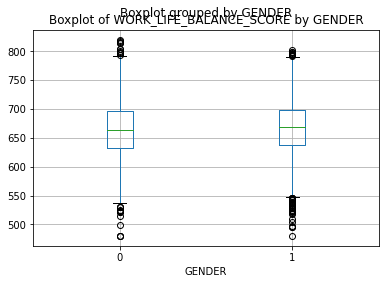

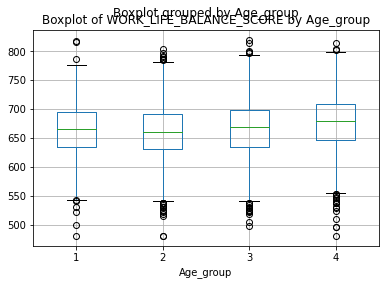

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert PySpark DataFrame to a Pandas DataFrame
pandas_df = df.toPandas()

# Boxplot by GENDER
pandas_df.boxplot(column='WORK_LIFE_BALANCE_SCORE', by='GENDER')
plt.title("Boxplot of WORK_LIFE_BALANCE_SCORE by GENDER")
plt.show()

# Boxplot by Age_Group
pandas_df.boxplot(column='WORK_LIFE_BALANCE_SCORE', by='Age_group')
plt.title("Boxplot of WORK_LIFE_BALANCE_SCORE by Age_group")
plt.show()

AnalysisException: cannot resolve 'Normalized_SCORE' given input columns: [ACHIEVEMENT, AGE, Age_group, BMI_RANGE, CORE_CIRCLE, DAILY_SHOUTING, DAILY_STEPS, DAILY_STRESS, DONATION, FLOW, FRUITS_VEGGIES, GENDER, LIVE_VISION, LOST_VACATION, PERSONAL_AWARDS, PLACES_VISITED, SLEEP_HOURS, SOCIAL_NETWORK, SUFFICIENT_INCOME, SUPPORTING_OTHERS, TIME_FOR_PASSION, TODO_COMPLETED, Timestamp, WEEKLY_MEDITATION, WORK_LIFE_BALANCE_SCORE, Year, features];
'Project [features#8026, 'Normalized_SCORE]
+- Project [Timestamp#2280, FRUITS_VEGGIES#2352, DAILY_STRESS#7300, PLACES_VISITED#2402, CORE_CIRCLE#2427, SUPPORTING_OTHERS#2452, SOCIAL_NETWORK#2477, ACHIEVEMENT#2502, DONATION#2527, BMI_RANGE#7454, TODO_COMPLETED#2577, FLOW#2602, DAILY_STEPS#2627, LIVE_VISION#2652, SLEEP_HOURS#6961, LOST_VACATION#2702, DAILY_SHOUTING#2727, SUFFICIENT_INCOME#7481, PERSONAL_AWARDS#2777, TIME_FOR_PASSION#2802, WEEKLY_MEDITATION#2827, AGE#2301, GENDER#7107, WORK_LIFE_BALANCE_SCORE#2852, ... 3 more fields]
   +- Project [Timestamp#2280, FRUITS_VEGGIES#2352, DAILY_STRESS#7300, PLACES_VISITED#2402, CORE_CIRCLE#2427, SUPPORTING_OTHERS#2452, SOCIAL_NETWORK#2477, ACHIEVEMENT#2502, DONATION#2527, BMI_RANGE#7454, TODO_COMPLETED#2577, FLOW#2602, DAILY_STEPS#2627, LIVE_VISION#2652, SLEEP_HOURS#6961, LOST_VACATION#2702, DAILY_SHOUTING#2727, CASE WHEN (SUFFICIENT_INCOME#2752 = 1) THEN 0 WHEN (SUFFICIENT_INCOME#2752 = 2) THEN 1 ELSE SUFFICIENT_INCOME#2752 END AS SUFFICIENT_INCOME#7481, PERSONAL_AWARDS#2777, TIME_FOR_PASSION#2802, WEEKLY_MEDITATION#2827, AGE#2301, GENDER#7107, WORK_LIFE_BALANCE_SCORE#2852, ... 2 more fields]
      +- Project [Timestamp#2280, FRUITS_VEGGIES#2352, DAILY_STRESS#7300, PLACES_VISITED#2402, CORE_CIRCLE#2427, SUPPORTING_OTHERS#2452, SOCIAL_NETWORK#2477, ACHIEVEMENT#2502, DONATION#2527, CASE WHEN (BMI_RANGE#2552 = 1) THEN 0 WHEN (BMI_RANGE#2552 = 2) THEN 1 ELSE BMI_RANGE#2552 END AS BMI_RANGE#7454, TODO_COMPLETED#2577, FLOW#2602, DAILY_STEPS#2627, LIVE_VISION#2652, SLEEP_HOURS#6961, LOST_VACATION#2702, DAILY_SHOUTING#2727, SUFFICIENT_INCOME#2752, PERSONAL_AWARDS#2777, TIME_FOR_PASSION#2802, WEEKLY_MEDITATION#2827, AGE#2301, GENDER#7107, WORK_LIFE_BALANCE_SCORE#2852, ... 2 more fields]
         +- Project [Timestamp#2280, FRUITS_VEGGIES#2352, CASE WHEN isnull(DAILY_STRESS#2377) THEN 3 ELSE DAILY_STRESS#2377 END AS DAILY_STRESS#7300, PLACES_VISITED#2402, CORE_CIRCLE#2427, SUPPORTING_OTHERS#2452, SOCIAL_NETWORK#2477, ACHIEVEMENT#2502, DONATION#2527, BMI_RANGE#2552, TODO_COMPLETED#2577, FLOW#2602, DAILY_STEPS#2627, LIVE_VISION#2652, SLEEP_HOURS#6961, LOST_VACATION#2702, DAILY_SHOUTING#2727, SUFFICIENT_INCOME#2752, PERSONAL_AWARDS#2777, TIME_FOR_PASSION#2802, WEEKLY_MEDITATION#2827, AGE#2301, GENDER#7107, WORK_LIFE_BALANCE_SCORE#2852, ... 2 more fields]
            +- Project [Timestamp#2280, FRUITS_VEGGIES#2352, DAILY_STRESS#2377, PLACES_VISITED#2402, CORE_CIRCLE#2427, SUPPORTING_OTHERS#2452, SOCIAL_NETWORK#2477, ACHIEVEMENT#2502, DONATION#2527, BMI_RANGE#2552, TODO_COMPLETED#2577, FLOW#2602, DAILY_STEPS#2627, LIVE_VISION#2652, SLEEP_HOURS#6961, LOST_VACATION#2702, DAILY_SHOUTING#2727, SUFFICIENT_INCOME#2752, PERSONAL_AWARDS#2777, TIME_FOR_PASSION#2802, WEEKLY_MEDITATION#2827, AGE#2301, GENDER#7107, WORK_LIFE_BALANCE_SCORE#2852, ... 2 more fields]
               +- Project [Timestamp#2280, FRUITS_VEGGIES#2352, DAILY_STRESS#2377, PLACES_VISITED#2402, CORE_CIRCLE#2427, SUPPORTING_OTHERS#2452, SOCIAL_NETWORK#2477, ACHIEVEMENT#2502, DONATION#2527, BMI_RANGE#2552, TODO_COMPLETED#2577, FLOW#2602, DAILY_STEPS#2627, LIVE_VISION#2652, SLEEP_HOURS#6961, LOST_VACATION#2702, DAILY_SHOUTING#2727, SUFFICIENT_INCOME#2752, PERSONAL_AWARDS#2777, TIME_FOR_PASSION#2802, WEEKLY_MEDITATION#2827, AGE#2301, cast(CASE WHEN (GENDER#2302 = Female) THEN cast(1 as string) WHEN (GENDER#2302 = Male) THEN cast(0 as string) ELSE GENDER#2302 END as int) AS GENDER#7107, WORK_LIFE_BALANCE_SCORE#2852, Year#7027]
                  +- Project [Timestamp#2280, FRUITS_VEGGIES#2352, DAILY_STRESS#2377, PLACES_VISITED#2402, CORE_CIRCLE#2427, SUPPORTING_OTHERS#2452, SOCIAL_NETWORK#2477, ACHIEVEMENT#2502, DONATION#2527, BMI_RANGE#2552, TODO_COMPLETED#2577, FLOW#2602, DAILY_STEPS#2627, LIVE_VISION#2652, SLEEP_HOURS#6961, LOST_VACATION#2702, DAILY_SHOUTING#2727, SUFFICIENT_INCOME#2752, PERSONAL_AWARDS#2777, TIME_FOR_PASSION#2802, WEEKLY_MEDITATION#2827, AGE#2301, GENDER#2302, WORK_LIFE_BALANCE_SCORE#2852, concat_ws(20, substring(Timestamp#2280, -2, 2)) AS Year#7027]
                     +- Project [Timestamp#2280, FRUITS_VEGGIES#2352, DAILY_STRESS#2377, PLACES_VISITED#2402, CORE_CIRCLE#2427, SUPPORTING_OTHERS#2452, SOCIAL_NETWORK#2477, ACHIEVEMENT#2502, DONATION#2527, BMI_RANGE#2552, TODO_COMPLETED#2577, FLOW#2602, DAILY_STEPS#2627, LIVE_VISION#2652, CASE WHEN ((SLEEP_HOURS#2677 = 1) OR (SLEEP_HOURS#2677 = 2)) THEN 7 ELSE SLEEP_HOURS#2677 END AS SLEEP_HOURS#6961, LOST_VACATION#2702, DAILY_SHOUTING#2727, SUFFICIENT_INCOME#2752, PERSONAL_AWARDS#2777, TIME_FOR_PASSION#2802, WEEKLY_MEDITATION#2827, AGE#2301, GENDER#2302, WORK_LIFE_BALANCE_SCORE#2852]
                        +- Project [Timestamp#2280, FRUITS_VEGGIES#2352, DAILY_STRESS#2377, PLACES_VISITED#2402, CORE_CIRCLE#2427, SUPPORTING_OTHERS#2452, SOCIAL_NETWORK#2477, ACHIEVEMENT#2502, DONATION#2527, BMI_RANGE#2552, TODO_COMPLETED#2577, FLOW#2602, DAILY_STEPS#2627, LIVE_VISION#2652, SLEEP_HOURS#2677, LOST_VACATION#2702, DAILY_SHOUTING#2727, SUFFICIENT_INCOME#2752, PERSONAL_AWARDS#2777, TIME_FOR_PASSION#2802, WEEKLY_MEDITATION#2827, AGE#2301, GENDER#2302, cast(WORK_LIFE_BALANCE_SCORE#2303 as int) AS WORK_LIFE_BALANCE_SCORE#2852]
                           +- Project [Timestamp#2280, FRUITS_VEGGIES#2352, DAILY_STRESS#2377, PLACES_VISITED#2402, CORE_CIRCLE#2427, SUPPORTING_OTHERS#2452, SOCIAL_NETWORK#2477, ACHIEVEMENT#2502, DONATION#2527, BMI_RANGE#2552, TODO_COMPLETED#2577, FLOW#2602, DAILY_STEPS#2627, LIVE_VISION#2652, SLEEP_HOURS#2677, LOST_VACATION#2702, DAILY_SHOUTING#2727, SUFFICIENT_INCOME#2752, PERSONAL_AWARDS#2777, TIME_FOR_PASSION#2802, cast(WEEKLY_MEDITATION#2300 as int) AS WEEKLY_MEDITATION#2827, AGE#2301, GENDER#2302, WORK_LIFE_BALANCE_SCORE#2303]
                              +- Project [Timestamp#2280, FRUITS_VEGGIES#2352, DAILY_STRESS#2377, PLACES_VISITED#2402, CORE_CIRCLE#2427, SUPPORTING_OTHERS#2452, SOCIAL_NETWORK#2477, ACHIEVEMENT#2502, DONATION#2527, BMI_RANGE#2552, TODO_COMPLETED#2577, FLOW#2602, DAILY_STEPS#2627, LIVE_VISION#2652, SLEEP_HOURS#2677, LOST_VACATION#2702, DAILY_SHOUTING#2727, SUFFICIENT_INCOME#2752, PERSONAL_AWARDS#2777, cast(TIME_FOR_PASSION#2299 as int) AS TIME_FOR_PASSION#2802, WEEKLY_MEDITATION#2300, AGE#2301, GENDER#2302, WORK_LIFE_BALANCE_SCORE#2303]
                                 +- Project [Timestamp#2280, FRUITS_VEGGIES#2352, DAILY_STRESS#2377, PLACES_VISITED#2402, CORE_CIRCLE#2427, SUPPORTING_OTHERS#2452, SOCIAL_NETWORK#2477, ACHIEVEMENT#2502, DONATION#2527, BMI_RANGE#2552, TODO_COMPLETED#2577, FLOW#2602, DAILY_STEPS#2627, LIVE_VISION#2652, SLEEP_HOURS#2677, LOST_VACATION#2702, DAILY_SHOUTING#2727, SUFFICIENT_INCOME#2752, cast(PERSONAL_AWARDS#2298 as int) AS PERSONAL_AWARDS#2777, TIME_FOR_PASSION#2299, WEEKLY_MEDITATION#2300, AGE#2301, GENDER#2302, WORK_LIFE_BALANCE_SCORE#2303]
                                    +- Project [Timestamp#2280, FRUITS_VEGGIES#2352, DAILY_STRESS#2377, PLACES_VISITED#2402, CORE_CIRCLE#2427, SUPPORTING_OTHERS#2452, SOCIAL_NETWORK#2477, ACHIEVEMENT#2502, DONATION#2527, BMI_RANGE#2552, TODO_COMPLETED#2577, FLOW#2602, DAILY_STEPS#2627, LIVE_VISION#2652, SLEEP_HOURS#2677, LOST_VACATION#2702, DAILY_SHOUTING#2727, cast(SUFFICIENT_INCOME#2297 as int) AS SUFFICIENT_INCOME#2752, PERSONAL_AWARDS#2298, TIME_FOR_PASSION#2299, WEEKLY_MEDITATION#2300, AGE#2301, GENDER#2302, WORK_LIFE_BALANCE_SCORE#2303]
                                       +- Project [Timestamp#2280, FRUITS_VEGGIES#2352, DAILY_STRESS#2377, PLACES_VISITED#2402, CORE_CIRCLE#2427, SUPPORTING_OTHERS#2452, SOCIAL_NETWORK#2477, ACHIEVEMENT#2502, DONATION#2527, BMI_RANGE#2552, TODO_COMPLETED#2577, FLOW#2602, DAILY_STEPS#2627, LIVE_VISION#2652, SLEEP_HOURS#2677, LOST_VACATION#2702, cast(DAILY_SHOUTING#2296 as int) AS DAILY_SHOUTING#2727, SUFFICIENT_INCOME#2297, PERSONAL_AWARDS#2298, TIME_FOR_PASSION#2299, WEEKLY_MEDITATION#2300, AGE#2301, GENDER#2302, WORK_LIFE_BALANCE_SCORE#2303]
                                          +- Project [Timestamp#2280, FRUITS_VEGGIES#2352, DAILY_STRESS#2377, PLACES_VISITED#2402, CORE_CIRCLE#2427, SUPPORTING_OTHERS#2452, SOCIAL_NETWORK#2477, ACHIEVEMENT#2502, DONATION#2527, BMI_RANGE#2552, TODO_COMPLETED#2577, FLOW#2602, DAILY_STEPS#2627, LIVE_VISION#2652, SLEEP_HOURS#2677, cast(LOST_VACATION#2295 as int) AS LOST_VACATION#2702, DAILY_SHOUTING#2296, SUFFICIENT_INCOME#2297, PERSONAL_AWARDS#2298, TIME_FOR_PASSION#2299, WEEKLY_MEDITATION#2300, AGE#2301, GENDER#2302, WORK_LIFE_BALANCE_SCORE#2303]
                                             +- Project [Timestamp#2280, FRUITS_VEGGIES#2352, DAILY_STRESS#2377, PLACES_VISITED#2402, CORE_CIRCLE#2427, SUPPORTING_OTHERS#2452, SOCIAL_NETWORK#2477, ACHIEVEMENT#2502, DONATION#2527, BMI_RANGE#2552, TODO_COMPLETED#2577, FLOW#2602, DAILY_STEPS#2627, LIVE_VISION#2652, cast(SLEEP_HOURS#2294 as int) AS SLEEP_HOURS#2677, LOST_VACATION#2295, DAILY_SHOUTING#2296, SUFFICIENT_INCOME#2297, PERSONAL_AWARDS#2298, TIME_FOR_PASSION#2299, WEEKLY_MEDITATION#2300, AGE#2301, GENDER#2302, WORK_LIFE_BALANCE_SCORE#2303]
                                                +- Project [Timestamp#2280, FRUITS_VEGGIES#2352, DAILY_STRESS#2377, PLACES_VISITED#2402, CORE_CIRCLE#2427, SUPPORTING_OTHERS#2452, SOCIAL_NETWORK#2477, ACHIEVEMENT#2502, DONATION#2527, BMI_RANGE#2552, TODO_COMPLETED#2577, FLOW#2602, DAILY_STEPS#2627, cast(LIVE_VISION#2293 as int) AS LIVE_VISION#2652, SLEEP_HOURS#2294, LOST_VACATION#2295, DAILY_SHOUTING#2296, SUFFICIENT_INCOME#2297, PERSONAL_AWARDS#2298, TIME_FOR_PASSION#2299, WEEKLY_MEDITATION#2300, AGE#2301, GENDER#2302, WORK_LIFE_BALANCE_SCORE#2303]
                                                   +- Project [Timestamp#2280, FRUITS_VEGGIES#2352, DAILY_STRESS#2377, PLACES_VISITED#2402, CORE_CIRCLE#2427, SUPPORTING_OTHERS#2452, SOCIAL_NETWORK#2477, ACHIEVEMENT#2502, DONATION#2527, BMI_RANGE#2552, TODO_COMPLETED#2577, FLOW#2602, cast(DAILY_STEPS#2292 as int) AS DAILY_STEPS#2627, LIVE_VISION#2293, SLEEP_HOURS#2294, LOST_VACATION#2295, DAILY_SHOUTING#2296, SUFFICIENT_INCOME#2297, PERSONAL_AWARDS#2298, TIME_FOR_PASSION#2299, WEEKLY_MEDITATION#2300, AGE#2301, GENDER#2302, WORK_LIFE_BALANCE_SCORE#2303]
                                                      +- Project [Timestamp#2280, FRUITS_VEGGIES#2352, DAILY_STRESS#2377, PLACES_VISITED#2402, CORE_CIRCLE#2427, SUPPORTING_OTHERS#2452, SOCIAL_NETWORK#2477, ACHIEVEMENT#2502, DONATION#2527, BMI_RANGE#2552, TODO_COMPLETED#2577, cast(FLOW#2291 as int) AS FLOW#2602, DAILY_STEPS#2292, LIVE_VISION#2293, SLEEP_HOURS#2294, LOST_VACATION#2295, DAILY_SHOUTING#2296, SUFFICIENT_INCOME#2297, PERSONAL_AWARDS#2298, TIME_FOR_PASSION#2299, WEEKLY_MEDITATION#2300, AGE#2301, GENDER#2302, WORK_LIFE_BALANCE_SCORE#2303]
                                                         +- Project [Timestamp#2280, FRUITS_VEGGIES#2352, DAILY_STRESS#2377, PLACES_VISITED#2402, CORE_CIRCLE#2427, SUPPORTING_OTHERS#2452, SOCIAL_NETWORK#2477, ACHIEVEMENT#2502, DONATION#2527, BMI_RANGE#2552, cast(TODO_COMPLETED#2290 as int) AS TODO_COMPLETED#2577, FLOW#2291, DAILY_STEPS#2292, LIVE_VISION#2293, SLEEP_HOURS#2294, LOST_VACATION#2295, DAILY_SHOUTING#2296, SUFFICIENT_INCOME#2297, PERSONAL_AWARDS#2298, TIME_FOR_PASSION#2299, WEEKLY_MEDITATION#2300, AGE#2301, GENDER#2302, WORK_LIFE_BALANCE_SCORE#2303]
                                                            +- Project [Timestamp#2280, FRUITS_VEGGIES#2352, DAILY_STRESS#2377, PLACES_VISITED#2402, CORE_CIRCLE#2427, SUPPORTING_OTHERS#2452, SOCIAL_NETWORK#2477, ACHIEVEMENT#2502, DONATION#2527, cast(BMI_RANGE#2289 as int) AS BMI_RANGE#2552, TODO_COMPLETED#2290, FLOW#2291, DAILY_STEPS#2292, LIVE_VISION#2293, SLEEP_HOURS#2294, LOST_VACATION#2295, DAILY_SHOUTING#2296, SUFFICIENT_INCOME#2297, PERSONAL_AWARDS#2298, TIME_FOR_PASSION#2299, WEEKLY_MEDITATION#2300, AGE#2301, GENDER#2302, WORK_LIFE_BALANCE_SCORE#2303]
                                                               +- Project [Timestamp#2280, FRUITS_VEGGIES#2352, DAILY_STRESS#2377, PLACES_VISITED#2402, CORE_CIRCLE#2427, SUPPORTING_OTHERS#2452, SOCIAL_NETWORK#2477, ACHIEVEMENT#2502, cast(DONATION#2288 as int) AS DONATION#2527, BMI_RANGE#2289, TODO_COMPLETED#2290, FLOW#2291, DAILY_STEPS#2292, LIVE_VISION#2293, SLEEP_HOURS#2294, LOST_VACATION#2295, DAILY_SHOUTING#2296, SUFFICIENT_INCOME#2297, PERSONAL_AWARDS#2298, TIME_FOR_PASSION#2299, WEEKLY_MEDITATION#2300, AGE#2301, GENDER#2302, WORK_LIFE_BALANCE_SCORE#2303]
                                                                  +- Project [Timestamp#2280, FRUITS_VEGGIES#2352, DAILY_STRESS#2377, PLACES_VISITED#2402, CORE_CIRCLE#2427, SUPPORTING_OTHERS#2452, SOCIAL_NETWORK#2477, cast(ACHIEVEMENT#2287 as int) AS ACHIEVEMENT#2502, DONATION#2288, BMI_RANGE#2289, TODO_COMPLETED#2290, FLOW#2291, DAILY_STEPS#2292, LIVE_VISION#2293, SLEEP_HOURS#2294, LOST_VACATION#2295, DAILY_SHOUTING#2296, SUFFICIENT_INCOME#2297, PERSONAL_AWARDS#2298, TIME_FOR_PASSION#2299, WEEKLY_MEDITATION#2300, AGE#2301, GENDER#2302, WORK_LIFE_BALANCE_SCORE#2303]
                                                                     +- Project [Timestamp#2280, FRUITS_VEGGIES#2352, DAILY_STRESS#2377, PLACES_VISITED#2402, CORE_CIRCLE#2427, SUPPORTING_OTHERS#2452, cast(SOCIAL_NETWORK#2286 as int) AS SOCIAL_NETWORK#2477, ACHIEVEMENT#2287, DONATION#2288, BMI_RANGE#2289, TODO_COMPLETED#2290, FLOW#2291, DAILY_STEPS#2292, LIVE_VISION#2293, SLEEP_HOURS#2294, LOST_VACATION#2295, DAILY_SHOUTING#2296, SUFFICIENT_INCOME#2297, PERSONAL_AWARDS#2298, TIME_FOR_PASSION#2299, WEEKLY_MEDITATION#2300, AGE#2301, GENDER#2302, WORK_LIFE_BALANCE_SCORE#2303]
                                                                        +- Project [Timestamp#2280, FRUITS_VEGGIES#2352, DAILY_STRESS#2377, PLACES_VISITED#2402, CORE_CIRCLE#2427, cast(SUPPORTING_OTHERS#2285 as int) AS SUPPORTING_OTHERS#2452, SOCIAL_NETWORK#2286, ACHIEVEMENT#2287, DONATION#2288, BMI_RANGE#2289, TODO_COMPLETED#2290, FLOW#2291, DAILY_STEPS#2292, LIVE_VISION#2293, SLEEP_HOURS#2294, LOST_VACATION#2295, DAILY_SHOUTING#2296, SUFFICIENT_INCOME#2297, PERSONAL_AWARDS#2298, TIME_FOR_PASSION#2299, WEEKLY_MEDITATION#2300, AGE#2301, GENDER#2302, WORK_LIFE_BALANCE_SCORE#2303]
                                                                           +- Project [Timestamp#2280, FRUITS_VEGGIES#2352, DAILY_STRESS#2377, PLACES_VISITED#2402, cast(CORE_CIRCLE#2284 as int) AS CORE_CIRCLE#2427, SUPPORTING_OTHERS#2285, SOCIAL_NETWORK#2286, ACHIEVEMENT#2287, DONATION#2288, BMI_RANGE#2289, TODO_COMPLETED#2290, FLOW#2291, DAILY_STEPS#2292, LIVE_VISION#2293, SLEEP_HOURS#2294, LOST_VACATION#2295, DAILY_SHOUTING#2296, SUFFICIENT_INCOME#2297, PERSONAL_AWARDS#2298, TIME_FOR_PASSION#2299, WEEKLY_MEDITATION#2300, AGE#2301, GENDER#2302, WORK_LIFE_BALANCE_SCORE#2303]
                                                                              +- Project [Timestamp#2280, FRUITS_VEGGIES#2352, DAILY_STRESS#2377, cast(PLACES_VISITED#2283 as int) AS PLACES_VISITED#2402, CORE_CIRCLE#2284, SUPPORTING_OTHERS#2285, SOCIAL_NETWORK#2286, ACHIEVEMENT#2287, DONATION#2288, BMI_RANGE#2289, TODO_COMPLETED#2290, FLOW#2291, DAILY_STEPS#2292, LIVE_VISION#2293, SLEEP_HOURS#2294, LOST_VACATION#2295, DAILY_SHOUTING#2296, SUFFICIENT_INCOME#2297, PERSONAL_AWARDS#2298, TIME_FOR_PASSION#2299, WEEKLY_MEDITATION#2300, AGE#2301, GENDER#2302, WORK_LIFE_BALANCE_SCORE#2303]
                                                                                 +- Project [Timestamp#2280, FRUITS_VEGGIES#2352, cast(DAILY_STRESS#2282 as int) AS DAILY_STRESS#2377, PLACES_VISITED#2283, CORE_CIRCLE#2284, SUPPORTING_OTHERS#2285, SOCIAL_NETWORK#2286, ACHIEVEMENT#2287, DONATION#2288, BMI_RANGE#2289, TODO_COMPLETED#2290, FLOW#2291, DAILY_STEPS#2292, LIVE_VISION#2293, SLEEP_HOURS#2294, LOST_VACATION#2295, DAILY_SHOUTING#2296, SUFFICIENT_INCOME#2297, PERSONAL_AWARDS#2298, TIME_FOR_PASSION#2299, WEEKLY_MEDITATION#2300, AGE#2301, GENDER#2302, WORK_LIFE_BALANCE_SCORE#2303]
                                                                                    +- Project [Timestamp#2280, cast(FRUITS_VEGGIES#2281 as int) AS FRUITS_VEGGIES#2352, DAILY_STRESS#2282, PLACES_VISITED#2283, CORE_CIRCLE#2284, SUPPORTING_OTHERS#2285, SOCIAL_NETWORK#2286, ACHIEVEMENT#2287, DONATION#2288, BMI_RANGE#2289, TODO_COMPLETED#2290, FLOW#2291, DAILY_STEPS#2292, LIVE_VISION#2293, SLEEP_HOURS#2294, LOST_VACATION#2295, DAILY_SHOUTING#2296, SUFFICIENT_INCOME#2297, PERSONAL_AWARDS#2298, TIME_FOR_PASSION#2299, WEEKLY_MEDITATION#2300, AGE#2301, GENDER#2302, WORK_LIFE_BALANCE_SCORE#2303]
                                                                                       +- Filter NOT (Timestamp#2280 = Timestamp)
                                                                                          +- Project [_c0#16 AS Timestamp#2280, _c1#17 AS FRUITS_VEGGIES#2281, _c2#18 AS DAILY_STRESS#2282, _c3#19 AS PLACES_VISITED#2283, _c4#20 AS CORE_CIRCLE#2284, _c5#21 AS SUPPORTING_OTHERS#2285, _c6#22 AS SOCIAL_NETWORK#2286, _c7#23 AS ACHIEVEMENT#2287, _c8#24 AS DONATION#2288, _c9#25 AS BMI_RANGE#2289, _c10#26 AS TODO_COMPLETED#2290, _c11#27 AS FLOW#2291, _c12#28 AS DAILY_STEPS#2292, _c13#29 AS LIVE_VISION#2293, _c14#30 AS SLEEP_HOURS#2294, _c15#31 AS LOST_VACATION#2295, _c16#32 AS DAILY_SHOUTING#2296, _c17#33 AS SUFFICIENT_INCOME#2297, _c18#34 AS PERSONAL_AWARDS#2298, _c19#35 AS TIME_FOR_PASSION#2299, _c20#36 AS WEEKLY_MEDITATION#2300, _c21#37 AS AGE#2301, _c22#38 AS GENDER#2302, _c23#39 AS WORK_LIFE_BALANCE_SCORE#2303]
                                                                                             +- Relation [_c0#16,_c1#17,_c2#18,_c3#19,_c4#20,_c5#21,_c6#22,_c7#23,_c8#24,_c9#25,_c10#26,_c11#27,_c12#28,_c13#29,_c14#30,_c15#31,_c16#32,_c17#33,_c18#34,_c19#35,_c20#36,_c21#37,_c22#38,_c23#39] csv
